In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os

files = os.listdir('.')
files

['plot-GPU-utilization.ipynb',
 '.DS_Store',
 'Terminal Saved Output (max_mem_length=1024  num_toks_pred=1024 num_samples=1)',
 'Terminal Saved Output (max_mem_length=512  num_toks_pred=1024 num_samples=1)',
 'Terminal Saved Output (Terminal Saved Output (max_mem_length=256  num_toks_pred=256 num_samples=1)',
 'Terminal Saved Output (max_mem_length=256  num_toks_pred=512 num_samples=1)',
 'Terminal Saved Output (max_mem_length=256  num_toks_pred=1024 num_samples=1)',
 '.ipynb_checkpoints']

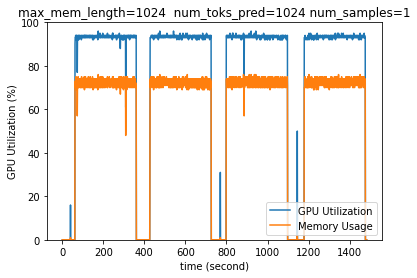

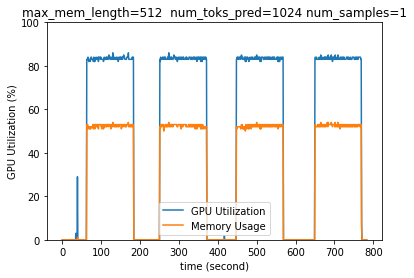

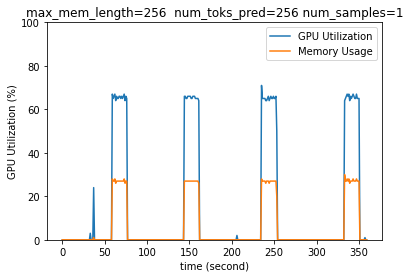

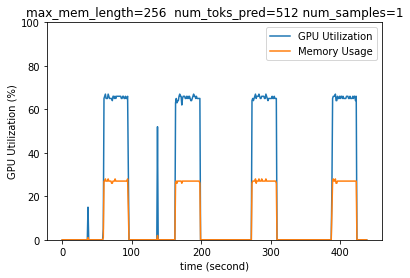

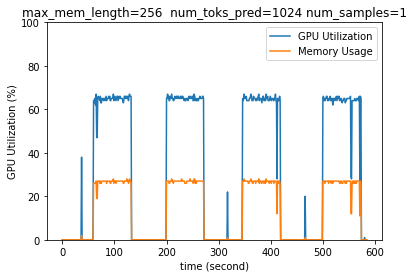

In [15]:
for fileName in files:
    if fileName[-1] != ")": continue
    file = Path.cwd() / fileName
    with open(file, 'r') as text:
        textfile = text.read()
    #     print(textfile)
    logs = textfile.split("]")[2].split("^")[0].split("\n")[1:-1]
    logs_parsed = [log.replace("%", "").split(",") for log in logs]
    for i in range(len(logs_parsed)):
        logs_parsed[i] = [int(log) for log in logs_parsed[i]]
    GPU = [log[0] for log in logs_parsed]
    Memory = [log[1] for log in logs_parsed]
    t = np.arange(len(GPU))
    plt.figure()
    plt.plot(t, GPU, label='GPU Utilization')
    plt.plot(t, Memory, label='Memory Usage')
    plt.ylim(0, 100)
    plt.xlabel("time (second)")
    plt.ylabel("GPU Utilization (%)")
    plt.legend()
    plt.title(fileName.split("/")[-1].split("(")[-1].split(")")[0])
